# ÁRBOLES DE DECISIÓN

### Pasos iniciales

Importamos librerías necesarias

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Cargamos el dataset correspondiente al análisis de diabetes en la India (Pima indians diabetes)

In [2]:
col_names=['pregnant','glucose','bloodpressure','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv(r'./datasets/pima-indians-diabetes.csv',header=None,names=col_names)
pima.head()

,pregnant,glucose,bloodpressure,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Establecemos las variables que actuarán como variables independientes y cúal será la variable objetivo o de salida

In [3]:
features_cols=['pregnant','insulin','bmi','age','glucose','bloodpressure','pedigree']
X=pima[features_cols] # Características
y=pima.label # Etiqueta / variable de salida

### Partición de los conjuntos TRAIN y TEST

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Construcción del modelo del Clasificador Árbol de Decisión y entrenamiento del mismo

In [5]:
classifier = DecisionTreeClassifier()
classifier= classifier.fit(X_train, y_train)

## Predicción

In [6]:
y_pred = classifier.predict(X_test)

## Evaluación del modelo

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result=confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(result)
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))

Confusion Matrix
[[116  30]
 [ 41  44]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       146
           1       0.59      0.52      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

Accuracy:  0.6926406926406926


## Visualización del árbol de decisión utilizado

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus # instalar en anaconda, por consola usando: conda install -c conda-forge pydotplus

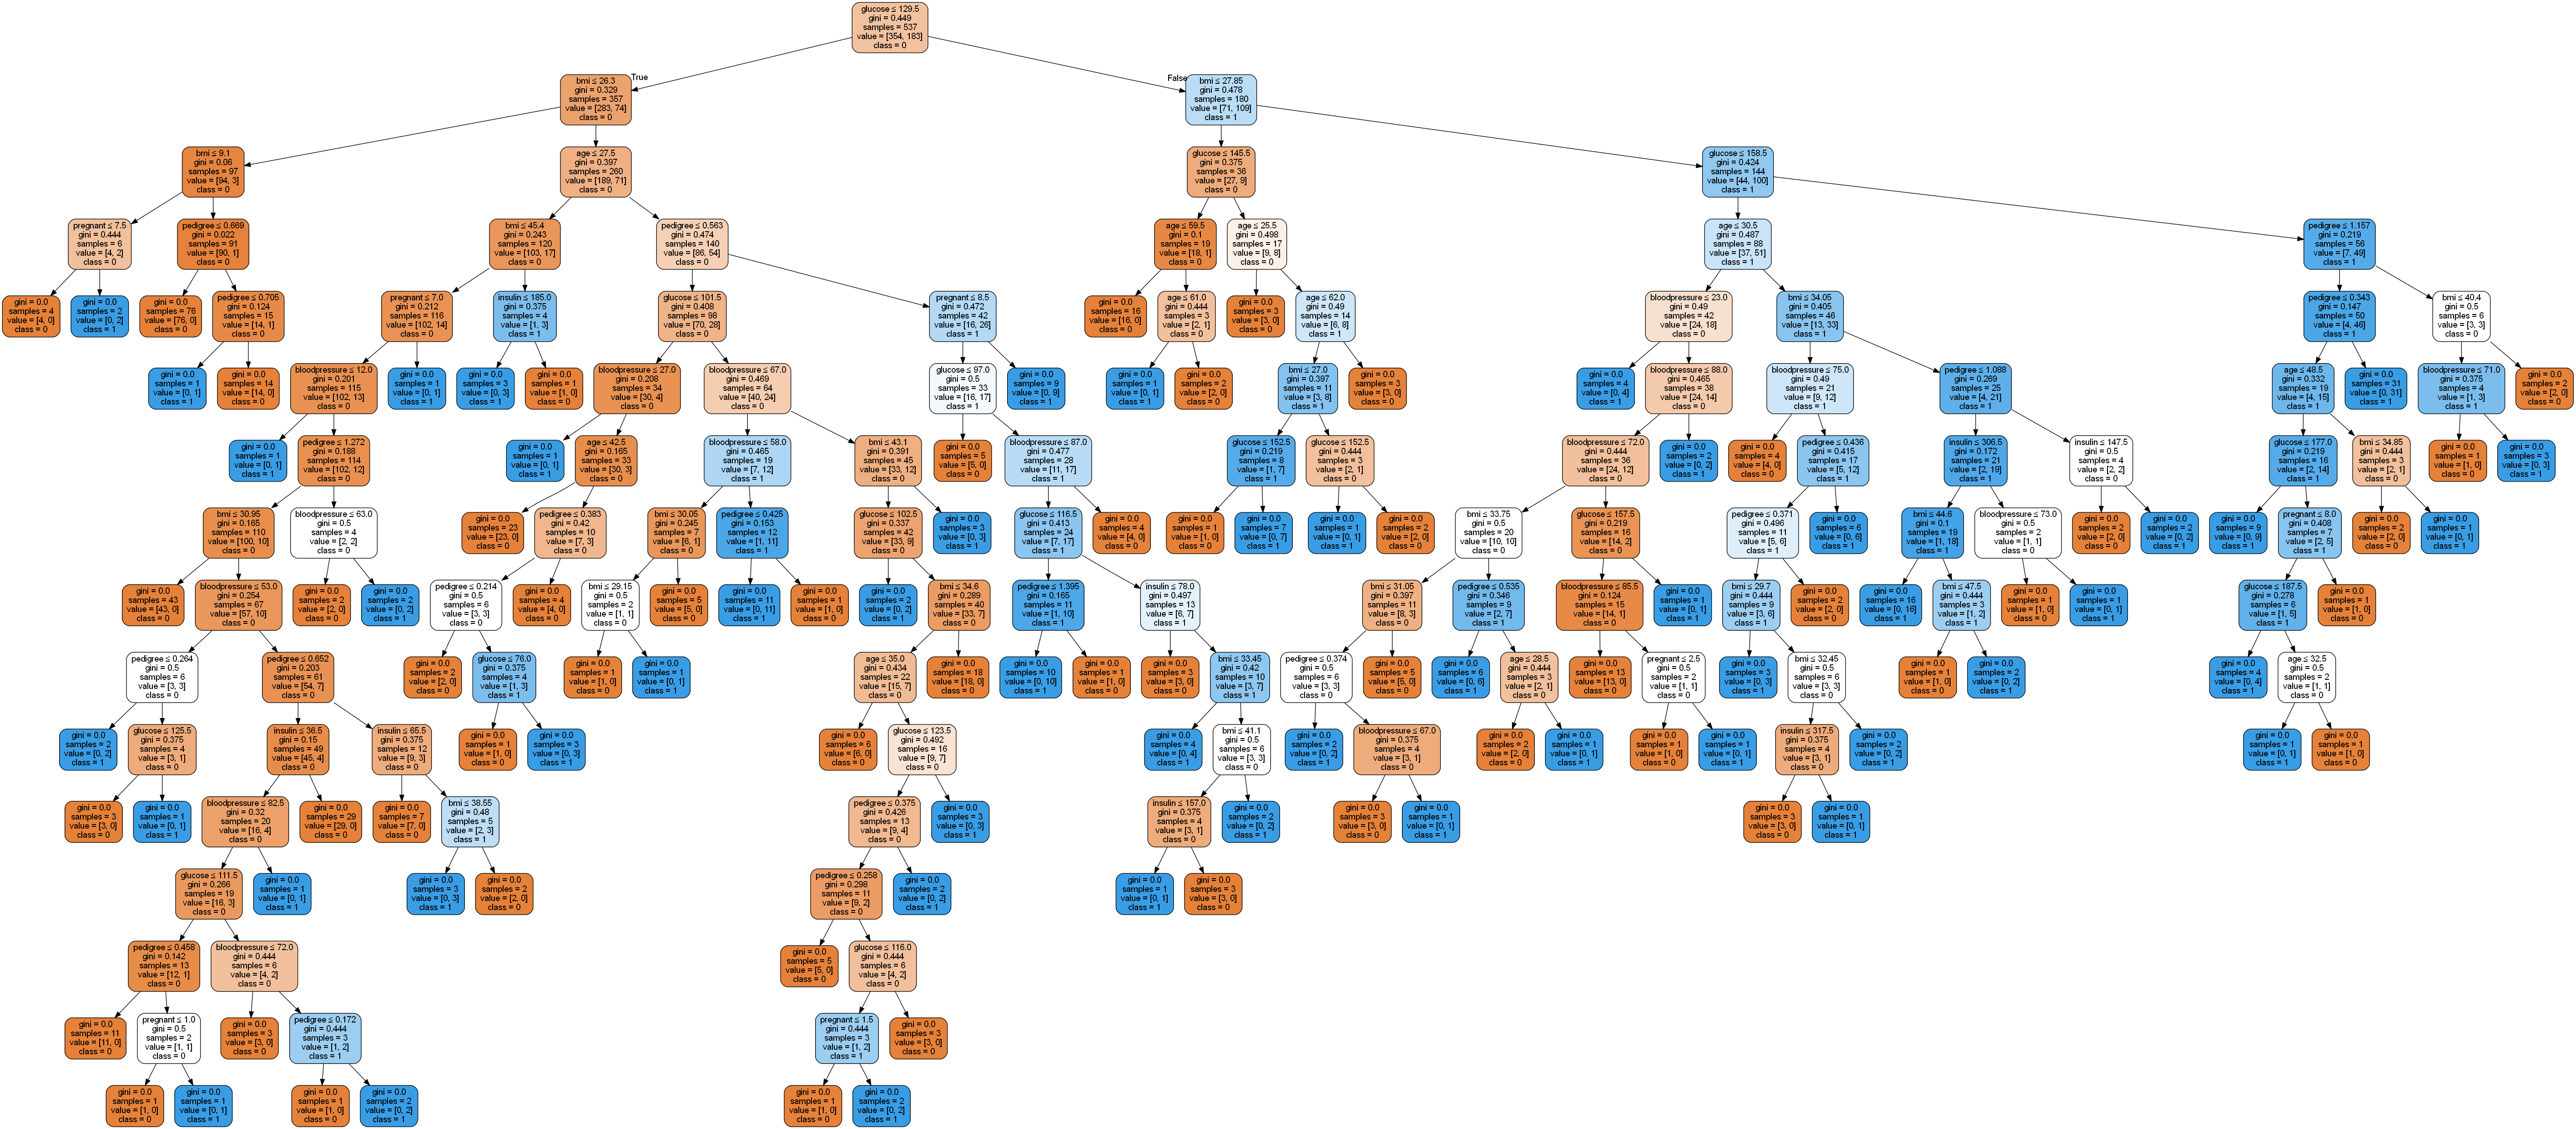

In [9]:
dot_data = StringIO()
export_graphviz(classifier, 
                out_file=dot_data, 
                feature_names=features_cols, 
                filled=True,
                rounded=True,
                special_characters=True,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima-indians-diabetes TREE')
Image(graph.create_png())